## January Effect of Smallest Companies and Biggest Companies ##

**Authors: Liling HUANG, Zhangjie LV, Shurui LIU, Kaisheng LIAN, Yuhong ZHU**

### 1. Background  
  January effect, first documented in Rozeff and Kinney (1976), describes the phenomenon that stock return in January is on average higher than non-January months. According to the Banz(1980), the performances among small companies and big companies are different. So we want to show that January effect exits among small firms instead of large firms.

### 2. Samples
* Raw data: 

(1)NYSE/AMEX/NASDAQ all the stocks in the sample period 1933-1977.

(2)Frequency:Monthly.

* Risk-free data: the rates of the three-month government bond in the sample period 1933-1977.

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [293]:
data = pd.read_sas('b.sas7bdat')
data_rf = pd.read_csv('TB 3MONTHS(1).csv')

### 3. Empirical steps
* Use the SAS to process the raw data first.

(1) Filtering the raw data, such as the return, dates, stock code, volunme, and so on.

(2) Calculating the market cap, and dividing the stocks into 5 groups by the previous month-end market cap in ascending order. This is named ID, and ID = [1,2,3,4,5]. If ID = 1, it represents the group of the smallest companies. If ID = 5, it represents the group of the biggest companies. Then, we obtain time series return of the 5 size portfolios. 

* Use the Python to do the further work, just as follows.

To show January effect, we compute the average monthly return in January and non-January months for each of the 5 portfolios every year. In the sample period 1933-1977, we have 45 January return and 45 non-January months mean return, and next we use the OLS method to test the difference between January and non-January months.

A. Calculating the market return weighted by the stocks' market value.

In [294]:
mktcap_list = data.groupby('year').sum()['mktcap']
mktcap = pd.DataFrame(mktcap_list)
mktcap.reset_index(inplace=True)
mktcap.columns = ['year','sum_mktcap']
merged = pd.merge(data, mktcap, left_on='year',right_on='year')
merged['proportion'] = merged['mktcap']/merged['sum_mktcap']   ### Calculate the market share of each stock.
merged['mkt_weighted_R'] = merged['proportion'] * merged['RET']  
mkt_R = pd.DataFrame(merged.groupby('year').sum()['mkt_weighted_R']) ### Calculate the weighted market return.
mkt_R.head()

,mkt_weighted_R
year,
1933.0,0.072492
1934.0,0.011933
1935.0,0.040957
1936.0,0.030065
1937.0,-0.022571


B. Calculating the mean of January return of the 5 portfolios. 

In [303]:
##Variate 'month' here represents a index function, where 1 means Jan and 0 means non-Jan

Jan_mean = sort_data[sort_data['month'] == 1].groupby(['id','year','month']).mean()['RET']
jan_m_df = pd.DataFrame(Jan_mean)
jan_m_df.reset_index(inplace=True) ##create Jan mean return for smallest firm

C. Calculating the mean of non-January return of the 5 portfolios. 

&

D. Distiguishing the non-January data from January data.

In [304]:
nonJan_mean = sort_data[sort_data['month'] != 1].groupby(['id','year']).mean()['RET']
nonJan_m_df = pd.DataFrame(nonJan_mean)
nonJan_m_df.reset_index(inplace=True)##create nonJan mean return for  smallest Firm
nonJan_m_df['month'] = 0

There is no raw data in Dec 1932. Therefore, we can not calculate the January return in 1933. Then, we will delete the non-January return in 1933.



E.In order to merge the dataset together in next steps, we transform the data type to dataframe.

In [305]:
tmp_1 = jan_m_df
tem_2 = nonJan_m_df
new_df = pd.concat([tmp_1,tem_2])
new_df.sort_values(['year','id'],ascending=True)

,RET,id,month,year
0,0.180445,1.0,0.0,1933.0
45,0.118488,2.0,0.0,1933.0
90,0.084433,3.0,0.0,1933.0
135,0.083902,4.0,0.0,1933.0
180,0.053647,5.0,0.0,1933.0
0,0.563773,1.0,1.0,1934.0
1,-0.002323,1.0,0.0,1934.0
44,0.404635,2.0,1.0,1934.0
46,-0.007072,2.0,0.0,1934.0
88,0.282326,3.0,1.0,1934.0


In [306]:
new_df1 = new_df[new_df['year']!=1933]
new_df1.sort_values(['year','id'],ascending=True)

,RET,id,month,year
0,0.563773,1.0,1.0,1934.0
1,-0.002323,1.0,0.0,1934.0
44,0.404635,2.0,1.0,1934.0
46,-0.007072,2.0,0.0,1934.0
88,0.282326,3.0,1.0,1934.0
91,-0.006612,3.0,0.0,1934.0
132,0.207454,4.0,1.0,1934.0
136,-0.003240,4.0,0.0,1934.0
176,0.136726,5.0,1.0,1934.0
181,-0.006833,5.0,0.0,1934.0


F. Merging the non-January data and the January data.

In [310]:
mkt_R.reset_index(inplace=True)

In [311]:
final = pd.merge(new_df1, mkt_R,left_on='year',right_on='year')
final['dummy'] = final['month']
final['constant'] = 1
filtered_final = final[(final['id']==1)|(final['id']==5)]

G.Plot some figures to observe the features of the return of non-January and January.

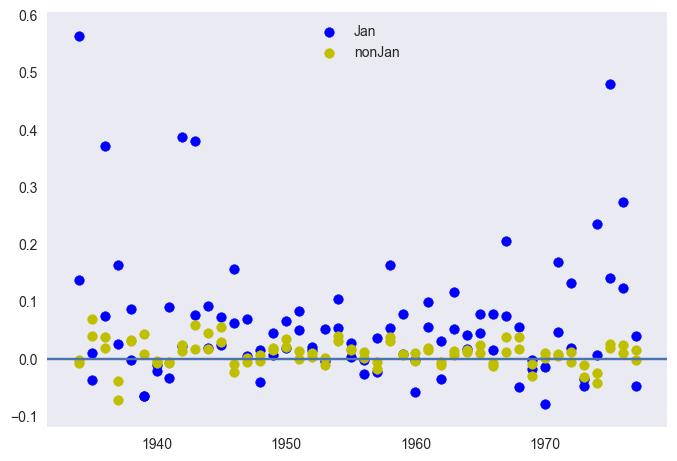

In [313]:
fig, ax = plt.subplots()
ax.scatter(filtered_final[filtered_final['month']==1]['year'],filtered_final[filtered_final['month']==1]['RET'],color='b',label='Jan')
ax.scatter(filtered_final[filtered_final['month']==0]['year'],filtered_final[filtered_final['month']==0]['RET'],color='y',label='nonJan')
#ax.plot(filtered_final[filtered_final['month']==0]['year'],[0]*len(filtered_final[filtered_final['month']==0]['year']),'k--')
plt.axhline()

ax.legend(loc='upper center')
plt.grid()
plt.show()

Through the scatter figure, it is not hard to find that the return of January is higher than the non-January months.

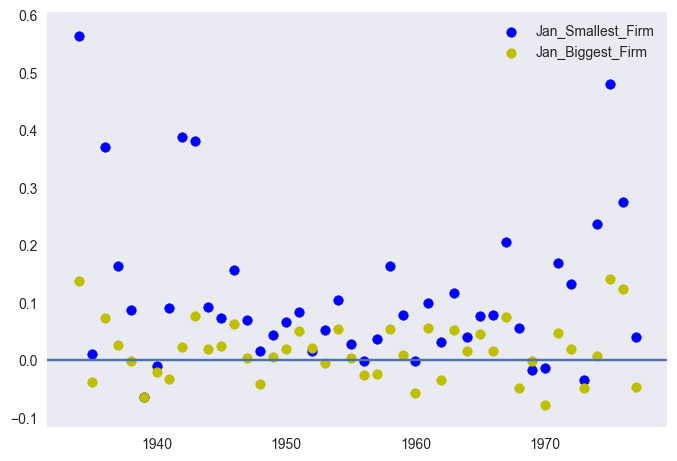

In [314]:
fig, ax = plt.subplots()
ax.scatter(filtered_final[(filtered_final['id']==1)&(filtered_final['month']==1)]['year'],filtered_final[(filtered_final['id']==1)&(filtered_final['month']==1)]['RET'],color='b',label='Jan_Smallest_Firm')
ax.scatter(filtered_final[(filtered_final['id']==5)&(filtered_final['month']==1)]['year'],filtered_final[(filtered_final['id']==5)&(filtered_final['month']==1)]['RET'],color='y',label='Jan_Biggest_Firm')
#ax.plot(filtered_final[filtered_final['month']==0]['year'],[0]*len(filtered_final[filtered_final['month']==0]['year']),'k--')
plt.axhline()

ax.legend()
plt.grid()
plt.show()

Through the second scatter figure, we can notice that maybe the January effect is more significant in the smallest firms.

C:\Users\phbs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


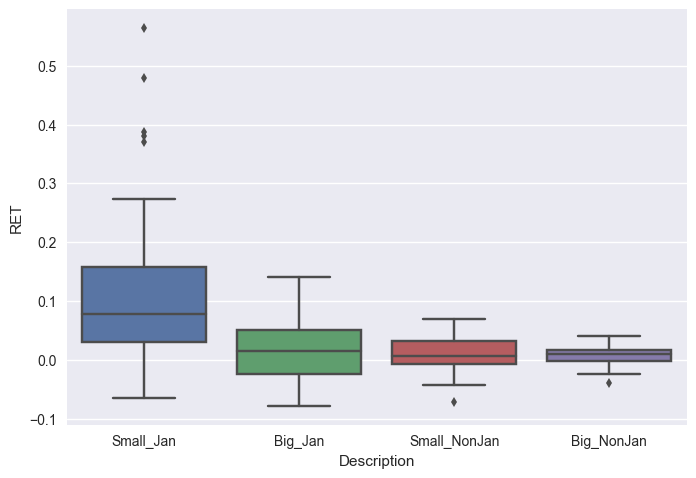

In [318]:
filtered_final['Index Variate'] = filtered_final['id'] + filtered_final['month']
state = pd.DataFrame()
state['Index Variate'] = [1,2,5,6]
state['Description'] = ['Small_NonJan','Small_Jan','Big_NonJan','Big_Jan']
lastone = pd.merge(filtered_final,state,left_on='Index Variate',right_on='Index Variate')
import seaborn as sns
sns.boxplot(x='Description',y='RET',data=lastone)
plt.show()

The figure of box-plot also supports our hypothesis:  January effect exits among small firms instead of large firms.

H. Using OLS method and introducing dummies to prove our hypothesis.

$$R_{i ,t}- R_{f,t}=\alpha+ \beta_{1} (R_{m,t}- R_{f,t}) + \beta_{2} Jan_{i} + \epsilon_{i,t}\quad(1) $$

$$R_{smallsize, i ,t}- R_{f,t}=\alpha+ \beta_{1} (R_{m,t}- R_{f,t}) + \beta_{2} Jan_{i} + \epsilon_{i,t}\quad(2) $$

$$R_{bigsize,i ,t}- R_{f,t}=\alpha+ \beta_{1} (R_{m,t}- R_{f,t}) + \beta_{2} Jan_{i} + \epsilon_{i,t}\quad(3) $$

a.Doing the OLS regression of formula (1). 

In [319]:
###Merge the risk-free rate into the dataset.
filtered_final['Index Variate'] = filtered_final['id'] + filtered_final['month']   
data_rf_tomerge = data_rf.drop('DATE',axis = 1)
data_rf_tomerge.columns = [['Tbill','year']]
final_withRf = pd.merge(final, data_rf_tomerge,left_on='year',right_on='year')

###Create the 2 differnt risk premiums as independent variables('Rm-Rf') and dependent variables('Ri-Rf').
final_withRf['Rm-Rf'] = final_withRf['mkt_weighted_R'] - final_withRf['Tbill']
final_withRf['Ri-Rf'] = final_withRf['RET'] - final_withRf['Tbill']

### Do the regression.
final_withRf_filtered = final_withRf[(final_withRf['id']==1)|(final_withRf['id']==5)]
import statsmodels.api as sm
results1 = sm.OLS(final_withRf_filtered['Ri-Rf'],final_withRf_filtered[['constant','Rm-Rf','dummy']]).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ri-Rf   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     28.53
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.96e-11
Time:                        21:46:33   Log-Likelihood:                 196.33
No. Observations:                 176   AIC:                            -386.7
Df Residuals:                     173   BIC:                            -377.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0019      0.009     -0.213      0.8

C:\Users\phbs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


b.Doing the OLS regression of formula (2).

In [320]:
### (1) Testing the significance of the January Effect in the smallest firms.
import statsmodels.api as sm
results1 = sm.OLS(final_withRf_filtered[final_withRf_filtered['id']==1]['Ri-Rf'],final_withRf_filtered[final_withRf_filtered['id']==1][['constant','Rm-Rf','dummy']]).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ri-Rf   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     20.71
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           4.72e-08
Time:                        21:46:41   Log-Likelihood:                 82.426
No. Observations:                  88   AIC:                            -158.9
Df Residuals:                      85   BIC:                            -151.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0009      0.015      0.059      0.9

In [321]:
### (2) Testing the significance of the January Effect in the biggest firms.
import statsmodels.api as sm
results1 = sm.OLS(final_withRf_filtered[final_withRf_filtered['id']==5]['Ri-Rf'],final_withRf_filtered[final_withRf_filtered['id']==5][['constant','Rm-Rf','dummy']]).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ri-Rf   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     37.53
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.09e-12
Time:                        21:46:46   Log-Likelihood:                 174.30
No. Observations:                  88   AIC:                            -342.6
Df Residuals:                      85   BIC:                            -335.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0047      0.005     -0.877      0.3

### 4.Conclusion

From the results,
* Regression 1(the whole samples)：the dummy and the independent variables('Rm-Rf') are both significant.
* Regression 2(only the smallest firms): the dummy and the independent variables('Rm-Rf') are both significant.
* Regression 3(only the biggest firms): the dummy is not significant. It means the January effect does not exist in biggest companies.

Therefore, we prove our hypothesis is reliable. January effect is statistically significant in the smallest portfolios.

### 5.  Extension

In the future, we can 
* do the research on more advanced asset pricing models.
* do out-of-sample test to look into if the January Effect exists in other time series.
* explore the factors affecting the January Effect.